# Decision Trees and Scikit-learn

Although, at a theoretical level, is very natural for a decision tree to handle categorical variables, scikit-learn only supports binary splits and categorical variables for now.

https://scikit-learn.org/stable/modules/tree.html#tree-algorithms-id3-c4-5-c5-0-and-cart

scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.

https://scikit-learn.org/stable/datasets/toy_dataset.html


In [1]:
import matplotlib.pyplot as plt
from sklearn import metrics, datasets, tree
from sklearn.model_selection import train_test_split

# 1. load 
iris = datasets.load_iris()
X, y = iris.data, iris.target

# partition data with train_test_spli

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=42)

#train:size 70%, 45 examples since the data set has 150 entries

#radom_state: Controls the shuffling applied to the data before applying the split. 
#Pass an int for reproducible output across multiple function calls
#Popular integer random seeds are 0 and 42

print("train size:",len(X_train),"\ntest size:",len(X_test))

train size: 105 
test size: 45


Define the classifier, in scikit-learnrequires $always$ numerical values
 one

## Decision tree of depth one with entropy

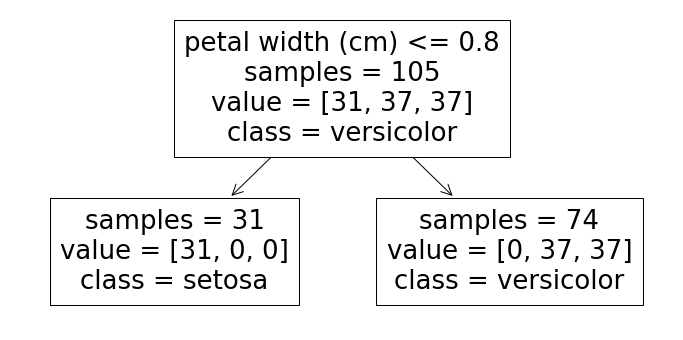

In [754]:
# 2. learn classifier
predictor = tree.DecisionTreeClassifier(criterion='entropy',max_depth=1)
predictor.fit(X_train, y_train)

# 3. plot classifier
figure = plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, feature_names=iris.feature_names, class_names=iris.target_names, impurity=False)
plt.show()

In [755]:
# 4. test classifier
y_pred = predictor.predict(X_test)
print("accuracy on testing set:",  round(metrics.accuracy_score(y_test, y_pred),2))

accuracy on testing set: 0.71


## Decision tree of depth two with entropy

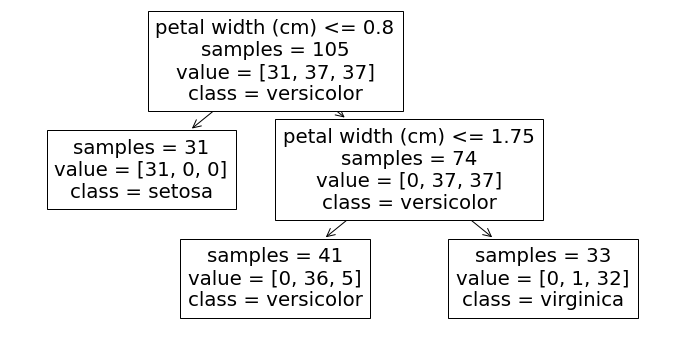

In [756]:
# 2. learn classifier
predictor = tree.DecisionTreeClassifier( criterion='entropy',max_depth=2)
predictor.fit(X_train, y_train)

# 3. plot classifier
figure = plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, feature_names=iris.feature_names, class_names=iris.target_names, impurity=False)
plt.show()

In [757]:
# 4. test classifier
y_pred = predictor.predict(X_test)
print("accuracy on testing set:",  round(metrics.accuracy_score(y_test, y_pred),2))

accuracy on testing set: 1.0


## Decision tree of depth three with entropy

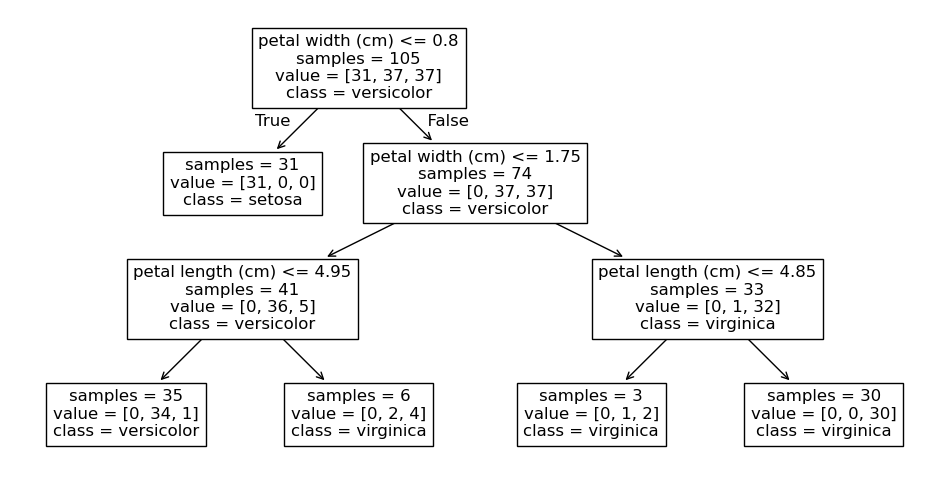

In [3]:
# 2. learn classifier
predictor = tree.DecisionTreeClassifier( criterion='entropy',max_depth=3)
predictor.fit(X_train, y_train)

# 3. plot classifier
figure = plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, feature_names=iris.feature_names, class_names=iris.target_names, impurity=False)
plt.show()

In [759]:
# 4. test classifier
y_pred = predictor.predict(X_test)
print("accuracy on testing set:",  round(metrics.accuracy_score(y_test, y_pred),2))

accuracy on testing set: 1.0


## Decision tree of depth four with entropy

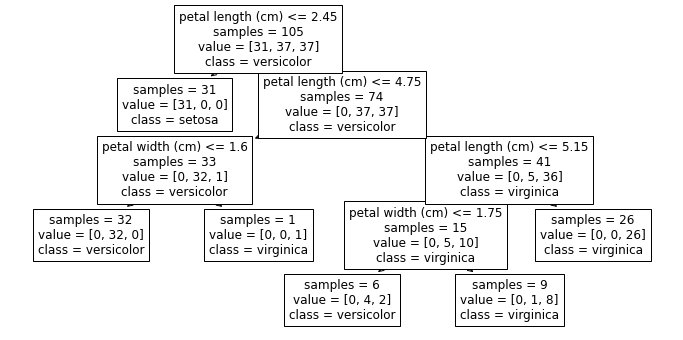

In [760]:
# 2. learn classifier
predictor = tree.DecisionTreeClassifier( criterion='entropy',max_depth=4)
predictor.fit(X_train, y_train)

# 3. plot classifier
figure = plt.figure(figsize=(12, 6))
tree.plot_tree(predictor, feature_names=iris.feature_names, class_names=iris.target_names, impurity=False)
plt.show()

In [761]:
# 4. test classifier
y_pred = predictor.predict(X_test)
print("accuracy on testing set:",  round(metrics.accuracy_score(y_test, y_pred),2))


accuracy on testing set: 1.0


## Decision tree without constraint of the depth with entropy

In [762]:
# 2. learn classifier
predictor = tree.DecisionTreeClassifier( criterion='entropy')
predictor.fit(X_train, y_train)
predictor.get_depth()

7

In [763]:
y_pred = predictor.predict(X_test)
print("accuracy on testing set:",  round(metrics.accuracy_score(y_test, y_pred),2))

accuracy on testing set: 0.98


## Decision tree without constraint of the depth without entropy but gini

We did not cover gini due to lack of time. The question is gini or entropy? The truth is in most cases it does not make any difference. 

In [764]:
# 2. learn classifier
predictor = tree.DecisionTreeClassifier()
predictor.fit(X_train, y_train)
predictor.get_depth()

6

In [765]:
predictor.get_n_leaves()

10

In [766]:
y_pred = predictor.predict(X_test)
print("accuracy on testing set:",  round(metrics.accuracy_score(y_test, y_pred),2))

accuracy on testing set: 1.0


###  Cross Validation

With cross validation  offers a more comprehensive evaluation, multiple estimates

In [767]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [768]:

print("Fold accuracies:\n",cross_val_score(predictor, X, y, cv=4, scoring='accuracy'))

Fold accuracies:
 [0.97368421 0.94736842 0.94594595 0.97297297]
